In [1]:
import pandas as pd


In [2]:
red = pd.read_csv('winequality-red.csv', delimiter=",")
white = pd.read_csv('winequality-white.csv', delimiter=",")

In [3]:
white['color'] = 0
red['color'] = 1

In [4]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [5]:
allwines = red.append(white, ignore_index=True)

In [6]:
allwines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
X = allwines.drop("color", axis=1)
y = allwines["color"]
print(X.shape, y.shape)

(6497, 12) (6497,)


In [8]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
classifier.fit(X_train, y_train)

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9802955665024631
Testing Data Score: 0.9772307692307692


In [12]:
 predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual color: {y_test[:10].tolist()}")

First 10 Predictions:   [0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
First 10 Actual color: [0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


In [13]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True) 

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,0,0
1623,0,0


In [14]:
wines_test = allwines[['fixed acidity','color']]

In [15]:
wines_test

,fixed acidity,color
0,7.4,1
1,7.8,1
2,7.8,1
3,11.2,1
4,7.4,1
...,...,...
6492,6.2,0
6493,6.6,0
6494,6.5,0
6495,5.5,0


In [16]:
X = wines_test.drop("color", axis=1)
y = wines_test["color"]
print(X.shape, y.shape)

(6497, 1) (6497,)


In [17]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [19]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [20]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8154761904761905
Testing Data Score: 0.820923076923077


In [21]:
probs = classifier.predict_proba(X_test)

In [22]:
probs

array([[0.71238877, 0.28761123],
       [0.94561588, 0.05438412],
       [0.71238877, 0.28761123],
       ...,
       [0.77113153, 0.22886847],
       [0.87354489, 0.12645511],
       [0.92744354, 0.07255646]])

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
 confusion_matrix(y_test, predictions)

array([[1224,   19],
       [  18,  364]])

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
models_to_run = [RandomForestRegressor()]

In [27]:
models_param_grid = [ 
                    { # 1st param grid, corresponding to RandomForestRegressor
                            'max_depth': [3, None],
                            'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
                            'max_features' : [50,100,150,200]}]

In [28]:
import numpy as np
from nested_cv import NestedCV
for i,model in enumerate(models_to_run):
    nested_CV_search = NestedCV(model=model, params_grid=models_param_grid[i],
                                outer_kfolds=5, inner_kfolds=5,
                                cv_options={'sqrt_of_score':True, 'randomized_search_iter':30})
    
    nested_CV_search.fit(X=X,y=y)
    model_param_grid = nested_CV_search.best_params

    print(np.mean(nested_CV_search.outer_scores))
    print(nested_CV_search.best_inner_params_list)

ValueError: max_features must be in (0, n_features]

In [29]:
import seaborn as sns
%matplotlib inline

In [ ]:
# sns.heatmap([allwines.x, allwines.y], annot=True)

In [ ]:
# sns.clustermap(allwines)

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


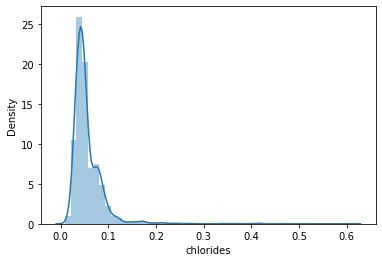

In [32]:
sns.distplot(allwines["chlorides"])

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


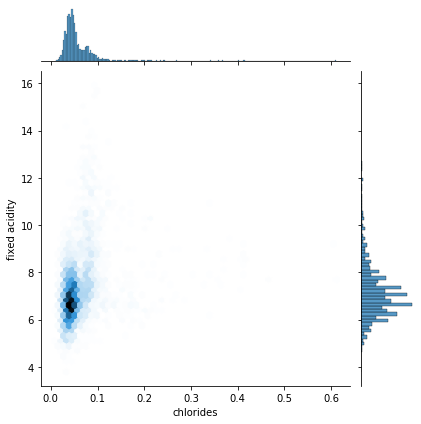

In [33]:
sns.jointplot(allwines['chlorides'], allwines['fixed acidity'], kind='hex')

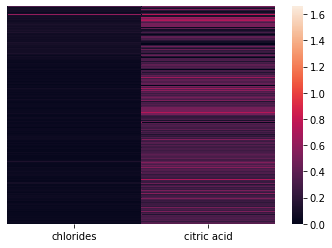

In [34]:
sns.heatmap(allwines[['chlorides', 'citric acid']], yticklabels=False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = allwines.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, title="All Wines")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = red.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

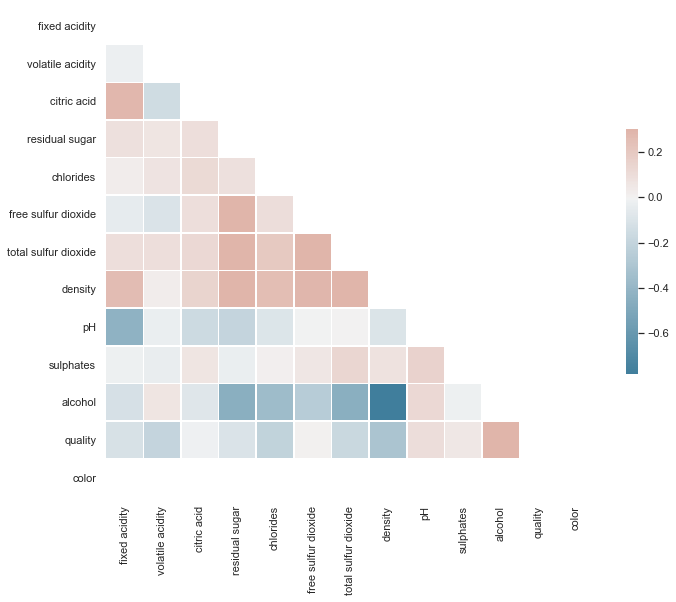

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = white.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Create initial Naïve Bayes model
nb = NaiveBayes(labelCol="label", featuresCol="features")

# Create ParamGrid for Cross Validation
nbparamGrid = (ParamGridBuilder()
               .addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
               .build())

# Evaluate model
nbevaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

# Create 5-fold CrossValidator
nbcv = CrossValidator(estimator = nb,
                    estimatorParamMaps = nbparamGrid,
                    evaluator = nbevaluator,
                    numFolds = 5)

# Run cross validations
nbcvModel = nbcv.fit(train)
print(nbcvModel)

# Use test set here so we can measure the accuracy of our model on new data
nbpredictions = nbcvModel.transform(test)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Accuracy:', nbevaluator.evaluate(nbpredictions))
print('AUC:', BinaryClassificationMetrics(nbpredictions['label','prediction'].rdd).areaUnderROC)

AttributeError: Cannot load _jvm from SparkContext. Is SparkContext initialized?